# CLUSTERING METHODS


### 0. Setting up necessary packages and creating data 

In [1]:
!pip install --user scikit-learn --upgrade

Traceback (most recent call last):
  File "/usr/local/anaconda5/bin/pip", line 7, in <module>
    from pip import main
ImportError: cannot import name 'main'


Import necessary packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn import datasets

# importing clustering algorithms
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering

from sklearn.metrics import silhouette_samples



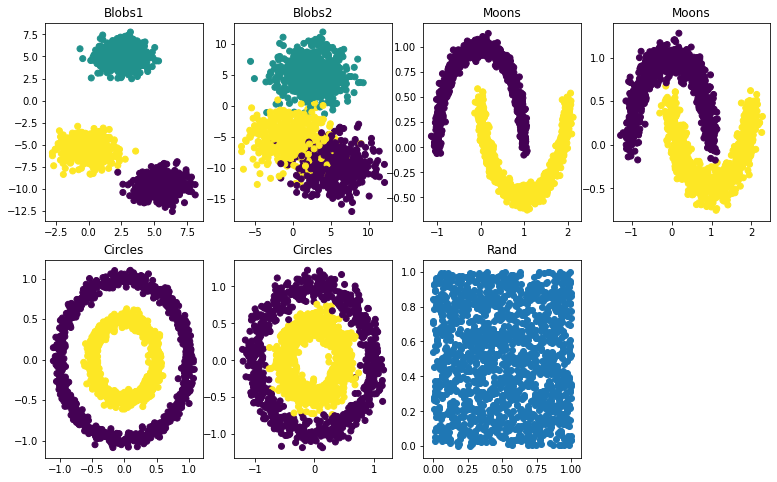

In [2]:
n_samples = 1500
random_state = 10

Blobs1_X, Blobs1_y = datasets.make_blobs(n_samples=n_samples,
                             random_state=random_state)
Blobs2_X, Blobs2_y = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[2.5, 2.5, 2.5],
                             random_state=random_state)
Moons1_X, Moons1_y = datasets.make_moons(n_samples=n_samples, noise=0.05,
                             random_state=random_state)
Moons2_X, Moons2_y = datasets.make_moons(n_samples=n_samples, noise=0.1,
                             random_state=random_state)
Circles1_X, Circles1_y = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05, random_state=random_state)
Circles2_X, Circles2_y = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=0.1, random_state=random_state)
Rand_X = np.random.rand(n_samples, 2);
plt.figure(figsize=(13,8))

plt.subplot(2,4,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c= Blobs1_y)
plt.title('Blobs1')

plt.subplot(2,4,2)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c= Blobs2_y)
plt.title('Blobs2')

plt.subplot(2,4,3)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c= Moons1_y)
plt.title('Moons')

plt.subplot(2,4,4)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c= Moons2_y)
plt.title('Moons')

plt.subplot(2,4,5)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c= Circles1_y)
plt.title('Circles')

plt.subplot(2,4,6)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c= Circles2_y)
plt.title('Circles')

plt.subplot(2,4,7)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1])
plt.title('Rand')
plt.show()

Code for RandIndex function

In [3]:
from scipy.special import comb
def rand_index(S, T):

    Spairs = comb(np.bincount(S), 2).sum()
    Tpairs = comb(np.bincount(T), 2).sum()
    
    A = np.c_[(S, T)]
    
    f_11 = sum(comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
             for i in set(S))
    
    f_10 = Spairs - f_11
    f_01 = Tpairs - f_11
    f_00 = comb(len(A), 2) - f_11 - f_10 - f_01
    return (f_00 + f_11) / (f_00 + f_01 + f_10 + f_11)

Code for Hopkins statistic

In [4]:
from sklearn.neighbors import NearestNeighbors 
from random import sample 
from numpy.random import uniform 
from math import isnan
def hopkins(X):
    n=X.shape[0]#rows
    d=X.shape[1]#cols
    p=int(0.1*n)#considering 10% of points
    nbrs=NearestNeighbors(n_neighbors=1).fit(X)
    
    rand_X=sample(range(0,n),p)
    uj=[]
    wj=[]
    for j in range(0,p):
        u_dist,_=nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1,-1),2,return_distance=True)
        uj.append(u_dist[0][1])#distances to nearest neighbors in random data
        w_dist,_=nbrs.kneighbors(X[rand_X[j]].reshape(1,-1),2,return_distance=True)
        wj.append(w_dist[0][1])#distances to nearest neighbors in real data
    H=sum(uj)/(sum(uj)+sum(wj))
    if isnan(H):
        print(uj,wj)
        H=0
        
    return H

Code for Silhouette coefficient

In [5]:
def silhouette(X,labels):
    n_clusters=np.size(np.unique(labels));
    sample_silhouette_values=silhouette_samples(X,labels)
    y_lower=10
    for i in range(n_clusters):
        ith_cluster_silhouette_values=sample_silhouette_values[labels==i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i=ith_cluster_silhouette_values.shape[0]
        y_upper=y_lower+size_cluster_i
        color=cm.nipy_spectral(float(i)/n_clusters)
        plt.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)# Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05,y_lower+0.5*size_cluster_i,str(i))#Compute the new y_lower for next cluster
        y_lower=y_upper+10# 10 for the 0 samples
    plt.title("Silhouette plot for the various clusters.")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    plt.show()

### 1. K-Means clustering

<span style="color:red">**Question 1a:** </span> Without running K-Means clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where k-Means is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span> Of the given datasets, k means algorithm works well on the Blobs 1 and blobs 2 dataset. As kmeans works best on globular data as it clusters the points based on nearesat distance to centroid, blobs type of data is expected to form good clusters by kmeans algorithm.

<span style="color:red">**Question 1b:** </span> Without running K-Means clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where k-Means is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span>It does not perform well on circles and moon shaped datasets. It is because, we can observe even though some data points are near to other they belong to different clusters. Kmeans is based on nearest distance to centoird, so all the nearest points are evaluated to same cluster, even though they have different shapes.



<span style="color:red">**Question 1c:** </span> Run K-Means algorithm on all the datasets (except Rand). Choose n_clusters based on the number of clusters present in these datasets. Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of K-means performance. Describe your rationale for your ranking.

Blobs 1 Dataset


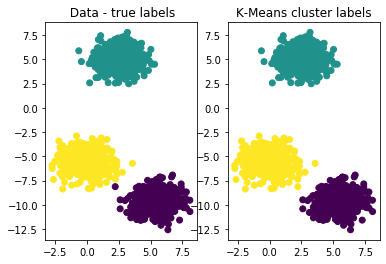

Blobs 2 Dataset


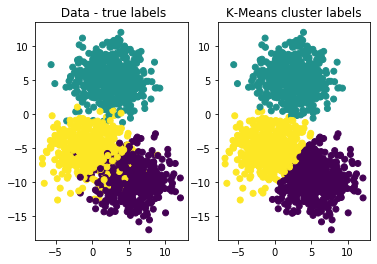

In [6]:
dat = [Blobs1_X, Blobs2_X]
lab = [Blobs1_y, Blobs2_y]
x = 1
preds = []
for data,lab in zip(dat,lab):
    n_clusters = 3
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    y_pred = kmeans.fit_predict(data)

    fig, ax = plt.subplots()
    plt.subplot(1,2,1)
    plt.scatter(data[:, 0], data[:, 1], c=lab) # true clusters
    print("Blobs "+str(x)+" Dataset")
    plt.title(' Data - true labels')
    plt.subplot(1,2,2)
    plt.scatter(data[:, 0], data[:, 1], c=y_pred)  # KMeans clusters
    plt.title('K-Means cluster labels')
    plt.show()
    x=x+1
    preds.append(y_pred)

Moons 1 Dataset


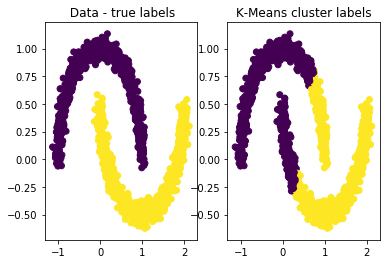

Moons 2 Dataset


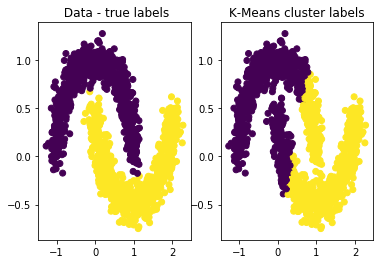

In [7]:
dat = [Moons1_X, Moons2_X]
lab = [Moons1_y, Moons2_y]
x = 1
for data,lab in zip(dat,lab):
    n_clusters = 2
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    y_pred = kmeans.fit_predict(data)

    fig, ax = plt.subplots()
    plt.subplot(1,2,1)
    plt.scatter(data[:, 0], data[:, 1], c=lab) # true clusters
    print("Moons "+str(x)+" Dataset")
    plt.title(' Data - true labels')
    plt.subplot(1,2,2)
    plt.scatter(data[:, 0], data[:, 1], c=y_pred)  # KMeans clusters
    plt.title('K-Means cluster labels')
    plt.show()
    x=x+1
    preds.append(y_pred)

Circles 1 Dataset


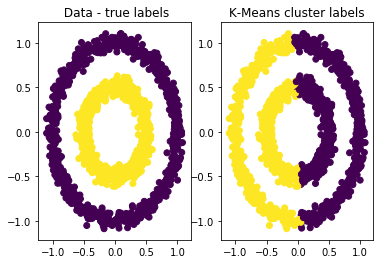

Circles 2 Dataset


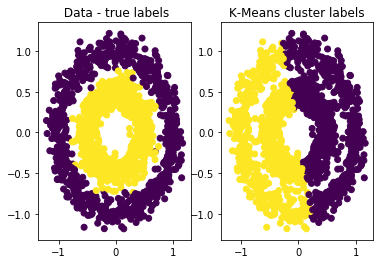

In [8]:
dat = [Circles1_X, Circles2_X]
lab = [Circles1_y, Circles2_y]
x = 1
for data,lab in zip(dat,lab):
    n_clusters = 2
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    y_pred = kmeans.fit_predict(data)

    fig, ax = plt.subplots()
    plt.subplot(1,2,1)
    plt.scatter(data[:, 0], data[:, 1], c=lab) # true clusters
    print("Circles "+str(x)+" Dataset")
    plt.title(' Data - true labels')
    plt.subplot(1,2,2)
    plt.scatter(data[:, 0], data[:, 1], c=y_pred)  # KMeans clusters
    plt.title('K-Means cluster labels')
    plt.show()
    x=x+1
    preds.append(y_pred)

<span style="color:green">**Answer:** </span> Performance: BLOBS1 > Blobs2 > Moons2 > Moons1 > Circles2 > Circles1.
<br><br> High performance means better clusters. Here we can clearly see kmeans does best on blobs datasets with most of points correctly clustered. Moon datasets almost 1/3rd of data points are wrong predicted in each dataset. Then almost half of data points are wrongly predicted in circles datasets with approx. 50% accuracy.


<span style="color:red">**Question 1d:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using K-means. Rank the datasets in decreasing order of Rand-Index scores.

In [9]:
preds

[array([2, 1, 1, ..., 1, 1, 1], dtype=int32),
 array([2, 1, 1, ..., 1, 1, 1], dtype=int32),
 array([0, 1, 1, ..., 0, 1, 1], dtype=int32),
 array([0, 1, 1, ..., 0, 1, 1], dtype=int32),
 array([0, 0, 1, ..., 1, 1, 1], dtype=int32),
 array([0, 0, 1, ..., 1, 1, 1], dtype=int32)]

In [10]:
labels = [ Blobs1_y, Blobs2_y, Moons1_y, Moons2_y, Circles1_y, Circles2_y]
for lab, p in zip(labels,preds):
    print("rand-index value is :",rand_index(lab, p))

rand-index value is : 0.99911140760507
rand-index value is : 0.9207142539470758
rand-index value is : 0.6201236379808761
rand-index value is : 0.6240836112964199
rand-index value is : 0.4996744496330887
rand-index value is : 0.4996806760062264


<span style="color:green">**Answer:** </span>
Performance based on Rand Index value : Blobs1 > Blobs2 > Moons2 > Moons1 > Circles2 > Circles1


<span style="color:red">**Question 1e:** </span> Are the rankings in (c) consistent with your observations in (d)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer:** </span> Yes, the ranking are same compared to the visualisaton. 



### 2. Agglomerative Clustering - Single Link

<span style="color:red">**Question 2a:** </span> Without running Single-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Single-link agglomerative clustering is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span> Agglomerative single link works well on the globular data. Of the datsets given, it will work well on the Blobs1, Circles1 and Moons1 dataset. As single link clustering is based on the nearest datapoints and joining them to form a cluster, well separated data compress well and distance within the cluster data points merge first to form the cluster, this results in clusters forming easily in well separated datapoints. 


<span style="color:red">**Question 2b:** </span> Without running Single-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Single-link agglomerative clustering is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span> It is not expected to work well on the Blobs2, Circles2 and Moons2 datasets.  if the data is distributed more (or has more outlier points) and a cluster has a datapoint far than any points in other cluster, then it will merge it first. This result in bad clustering in distributed datasets or outlier datasets. This resluts in merging the outliers in the last steps, which results in clusters with 1 or 2 datapoints.


<span style="color:red">**Question 2c:** </span> Run Single-link agglomerative clustering algorithm on all the datasets (except Rand). Choose n_clusters based on the number of clusters present in these datasets. Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of Single-link agglomerative algorithm performance. Describe your rationale for your ranking.

Blobs 1 Dataset


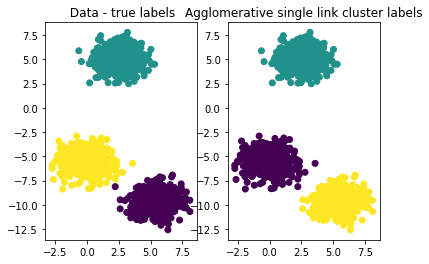

Blobs 2 Dataset


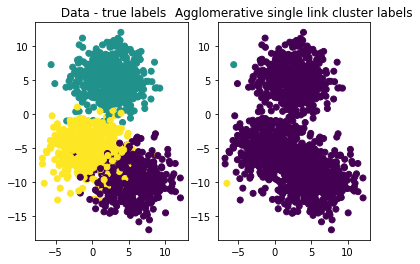

In [11]:
dat = [Blobs1_X, Blobs2_X]
lab = [Blobs1_y, Blobs2_y]
x = 1
preds2 = []
for data,lab in zip(dat,lab):
    n_clusters = 3
    single_linkage = AgglomerativeClustering(linkage="single", n_clusters=n_clusters)
    y_pred = single_linkage.fit_predict(data)

    fig, ax = plt.subplots()
    plt.subplot(1,2,1)
    plt.scatter(data[:, 0], data[:, 1], c=lab) # true clusters
    print("Blobs "+str(x)+" Dataset")
    plt.title(' Data - true labels')
    plt.subplot(1,2,2)
    plt.scatter(data[:, 0], data[:, 1], c=y_pred)  # KMeans clusters
    plt.title('Agglomerative single link cluster labels')
    plt.show()
    x=x+1
    preds2.append(y_pred)

Moons 1 Dataset


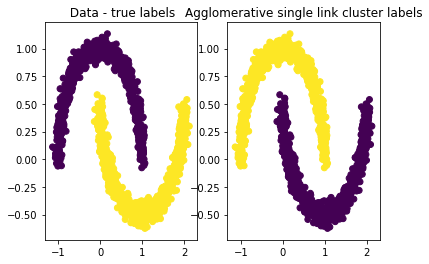

Moons 2 Dataset


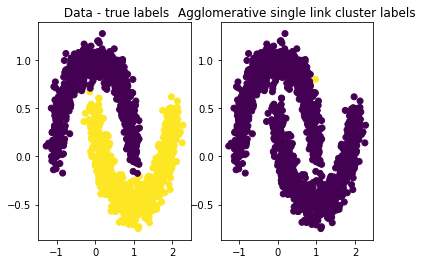

In [12]:
dat = [Moons1_X, Moons2_X]
lab = [Moons1_y, Moons2_y]
x = 1
for data,lab in zip(dat,lab):
    n_clusters = 2
    single_linkage = AgglomerativeClustering(linkage="single", n_clusters=n_clusters)
    y_pred = single_linkage.fit_predict(data)

    fig, ax = plt.subplots()
    plt.subplot(1,2,1)
    plt.scatter(data[:, 0], data[:, 1], c=lab) # true clusters
    print("Moons "+str(x)+" Dataset")
    plt.title(' Data - true labels')
    plt.subplot(1,2,2)
    plt.scatter(data[:, 0], data[:, 1], c=y_pred)  # KMeans clusters
    plt.title('Agglomerative single link cluster labels')
    plt.show()
    x=x+1
    preds2.append(y_pred)

Circles 1 Dataset


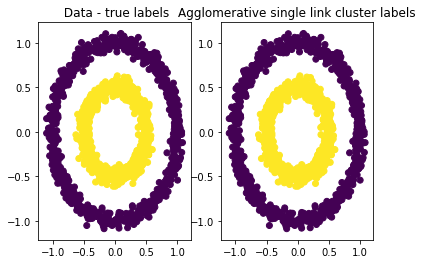

Circles 2 Dataset


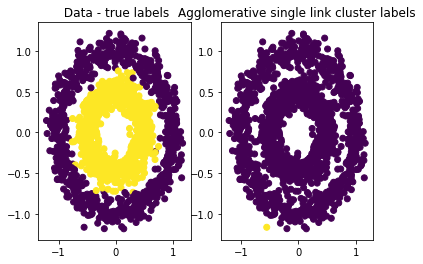

In [13]:
dat = [Circles1_X, Circles2_X]
lab = [Circles1_y, Circles2_y]
x = 1
for data,lab in zip(dat,lab):
    n_clusters = 2
    single_linkage = AgglomerativeClustering(linkage="single", n_clusters=n_clusters)
    y_pred = single_linkage.fit_predict(data)

    fig, ax = plt.subplots()
    plt.subplot(1,2,1)
    plt.scatter(data[:, 0], data[:, 1], c=lab) # true clusters
    print("Circles "+str(x)+" Dataset")
    plt.title(' Data - true labels')
    plt.subplot(1,2,2)
    plt.scatter(data[:, 0], data[:, 1], c=y_pred)  # KMeans clusters
    plt.title('Agglomerative single link cluster labels')
    plt.show()
    x=x+1
    preds2.append(y_pred)

<span style="color:green">**Answer:** </span>
Rank based on performance : Moons1, Circles1 > Blobs1 > Moons2, Circles2, Blobs2
<br> We can easily oberve all the blobs2, circles2 and moons2 datasets are having clusters with 1 datapoint only, which results in bad clustering. 
<BR> In Blobs1 dataset we can see 1 datapoint is misclassified but in other moons1 and circles1 dataset  no points are misclassified. 

<span style="color:red">**Question 2d:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using Single-link agglomerative clustering algorithm. Rank the datasets in decreasing order of Rand-Index scores.

In [14]:
for lab, p in zip(labels,preds2):
    print("rand-index value is :",rand_index(lab, p))

rand-index value is : 0.99911140760507
rand-index value is : 0.33377896375361354
rand-index value is : 1.0
rand-index value is : 0.49966733377807426
rand-index value is : 1.0
rand-index value is : 0.49966733377807426


<span style="color:green">**Answer:** </span>
Peformance :  Circles1, Moons1 > Blobs1 > Circles2, Moons2 > Blobs2


<span style="color:red">**Question 2e:** </span> Are the rankings in 2(c) consistent with your observations in 2(d)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer:** </span>
Yes, the rankings by visualisation are consistent with the rand index measure.


### 3. Agglomerative Clustering - Max Link

<span style="color:red">**Question 3a:** </span> Without running Max-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Max-link agglomerative clustering is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span> It should work best on the Blobs1 dataset. This clustering is based on inter cluster distances, So it should do best on the data which has minimum of maximum distances between datapoints. This is seen in the well separated data which is blobs1.

<span style="color:red">**Question 3b:** </span> Without running Max-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Max-link agglomerative clustering is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span>
I think the Max link doesnt work well on the circular datasets. This is because the data has one cluster within the other cluster. And almost all the data points have datapoints which are near in other clusters than most of the datapoints within the cluster.So when the datapoints are being merged based on max distance between clusters, we can see that some points within the clusters are far away than the points in the other cluster. 


<span style="color:red">**Question 3c:** </span> Run Max-link agglomerative clustering algorithm on all the datasets (except Rand). Choose n_clusters based on the number of clusters present in these datasets. Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of Max-link agglomerative algorithm performance. Describe your rationale for your ranking.

Blobs 1 Dataset


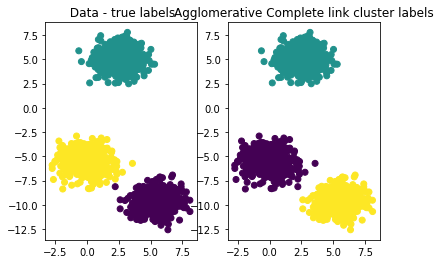

Blobs 2 Dataset


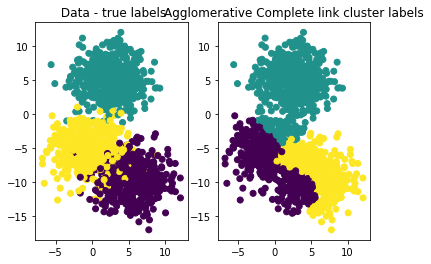

In [73]:
dat = [Blobs1_X, Blobs2_X]
lab = [Blobs1_y, Blobs2_y]
x = 1
preds3 = []
for data,lab in zip(dat,lab):
    n_clusters = 3
    max_linkage = AgglomerativeClustering(linkage="complete", n_clusters=n_clusters)
    y_pred = max_linkage.fit_predict(data)

    fig, ax = plt.subplots()
    plt.subplot(1,2,1)
    plt.scatter(data[:, 0], data[:, 1], c=lab) # true clusters
    print("Blobs "+str(x)+" Dataset")
    plt.title(' Data - true labels')
    plt.subplot(1,2,2)
    plt.scatter(data[:, 0], data[:, 1], c=y_pred)  # KMeans clusters
    plt.title('Agglomerative Complete link cluster labels')
    plt.show()
    x=x+1
    preds3.append(y_pred)

Moons 1 Dataset


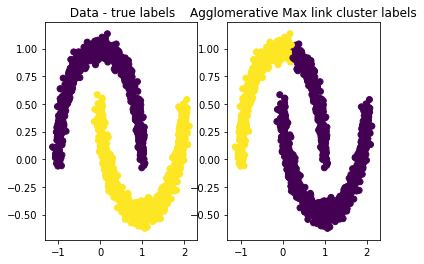

Moons 2 Dataset


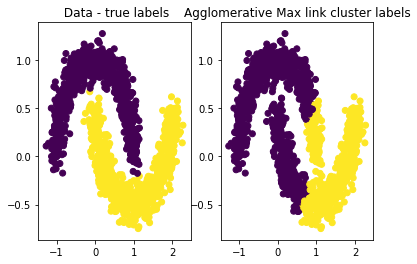

In [74]:
dat = [Moons1_X, Moons2_X]
lab = [Moons1_y, Moons2_y]
x = 1
for data,lab in zip(dat,lab):
    n_clusters = 2
    max_linkage = AgglomerativeClustering(linkage="complete", n_clusters=n_clusters)
    y_pred = max_linkage.fit_predict(data)

    fig, ax = plt.subplots()
    plt.subplot(1,2,1)
    plt.scatter(data[:, 0], data[:, 1], c=lab) # true clusters
    print("Moons "+str(x)+" Dataset")
    plt.title(' Data - true labels')
    plt.subplot(1,2,2)
    plt.scatter(data[:, 0], data[:, 1], c=y_pred)  # KMeans clusters
    plt.title('Agglomerative Max link cluster labels')
    plt.show()
    x=x+1
    preds3.append(y_pred)

Circles 1 Dataset


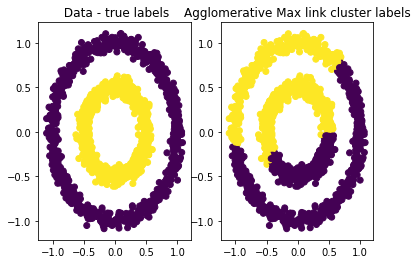

Circles 2 Dataset


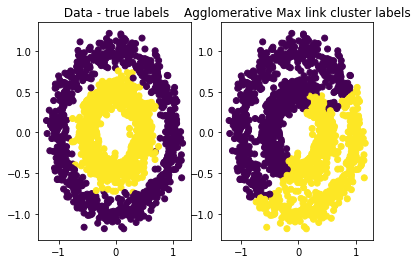

In [75]:
dat = [Circles1_X, Circles2_X]
lab = [Circles1_y, Circles2_y]
x = 1
for data,lab in zip(dat,lab):
    n_clusters = 2
    max_linkage = AgglomerativeClustering(linkage="complete", n_clusters=n_clusters)
    y_pred = max_linkage.fit_predict(data)

    fig, ax = plt.subplots()
    plt.subplot(1,2,1)
    plt.scatter(data[:, 0], data[:, 1], c=lab) # true clusters
    print("Circles "+str(x)+" Dataset")
    plt.title(' Data - true labels')
    plt.subplot(1,2,2)
    plt.scatter(data[:, 0], data[:, 1], c=y_pred)  # KMeans clusters
    plt.title('Agglomerative Max link cluster labels')
    plt.show()
    x=x+1
    preds3.append(y_pred)

<span style="color:green">**Answer:** </span>
Rank based on performance : Blobs1 > Blobs2 > Moons > Circles
<br> Blobs1 clearly separates the datasets except for 1  misclassified point. In moons dataset, one cluster is classified correct but one wing of the other cluster are wrongly predicted. The cicles dataset doesnt predict any of the clusters perfectly.


<span style="color:red">**Question 3d:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using Max-link agglomerative clustering algorithm. Rank the datasets in decreasing order of Rand-Index scores.

In [18]:
for lab, p in zip(labels,preds3):
    print("rand-index value is :",rand_index(lab, p))

rand-index value is : 0.99911140760507
rand-index value is : 0.7736544362908606
rand-index value is : 0.662605292417167
rand-index value is : 0.5965310206804536
rand-index value is : 0.5218714698688014
rand-index value is : 0.5000587058038692


<span style="color:green">**Answer:** </span>
Performance : Blobs1 > Blobs2 > Moons2 > Moons1 > Circles2 > Circles1


<span style="color:red">**Question 3e:** </span> Are the rankings in 3(c) consistent with your observations in 3(d)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer:** </span>
yes, the performance ranking is same compared to the observations.


### 4. Agglomerative Clustering - Average Link

<span style="color:red">**Question 4a:** </span> Without running Average-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Average-link agglomerative clustering is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span>
It should work best on the Blobs1 dataset. This clustering is based on avergae of inter cluster distances, So it should do best on the data which has minimum of average distances between datapoints. This is seen in the well separated data which is blobs1. The avergae distance is low within each clusters, so the clusters will merge onky after all the datapoints in the cluster are merged. Hence the well sepaarted data in blobs1 dataset performs well.


<span style="color:red">**Question 4b:** </span> Without running Average-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Average-link agglomerative clustering is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span>
Average link doesnt work well on the circular datasets. This is because the data has one cluster within the other cluster. So when the datapoints are being merged based on average distance between clusters, we can see that some points within the clusters are far away than the points in the other cluster. So the avergae link results in the clustering where the smallest average distance is present, this results in clusters which are nearby.


<span style="color:red">**Question 4c:** </span> Run Average-link agglomerative clustering algorithm on all the datasets (except Rand). Choose n_clusters based on the number of clusters present in these datasets. Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of Average-link agglomerative algorithm performance. Describe your rationale for your ranking.

Blobs 1 Dataset


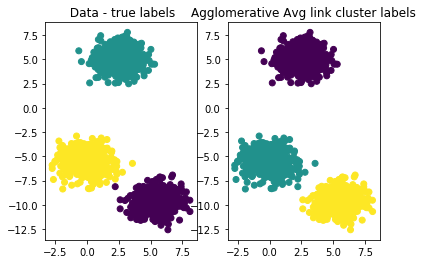

Blobs 2 Dataset


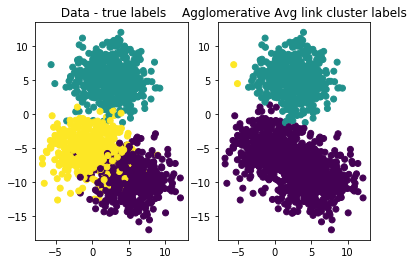

In [76]:
dat = [Blobs1_X, Blobs2_X]
lab = [Blobs1_y, Blobs2_y]
x = 1
preds4 = []
for data,lab in zip(dat,lab):
    n_clusters = 3
    avg_linkage = AgglomerativeClustering(linkage="average", n_clusters=n_clusters)
    y_pred = avg_linkage.fit_predict(data)

    fig, ax = plt.subplots()
    plt.subplot(1,2,1)
    plt.scatter(data[:, 0], data[:, 1], c=lab) # true clusters
    print("Blobs "+str(x)+" Dataset")
    plt.title(' Data - true labels')
    plt.subplot(1,2,2)
    plt.scatter(data[:, 0], data[:, 1], c=y_pred)  # KMeans clusters
    plt.title('Agglomerative Avg link cluster labels')
    plt.show()
    x=x+1
    preds4.append(y_pred)

Moons 1 Dataset


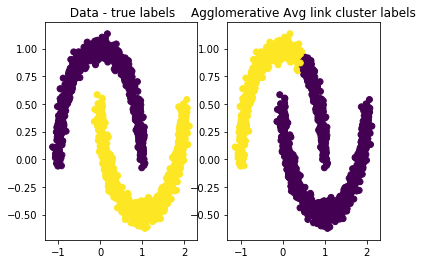

Moons 2 Dataset


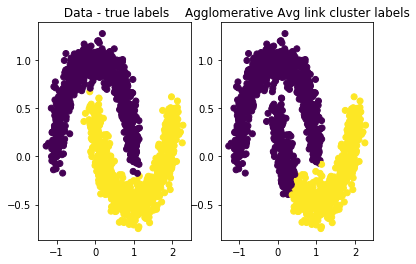

In [77]:
dat = [Moons1_X, Moons2_X]
lab = [Moons1_y, Moons2_y]
x = 1
for data,lab in zip(dat,lab):
    n_clusters = 2
    avg_linkage = AgglomerativeClustering(linkage="average", n_clusters=n_clusters)
    y_pred = avg_linkage.fit_predict(data)

    fig, ax = plt.subplots()
    plt.subplot(1,2,1)
    plt.scatter(data[:, 0], data[:, 1], c=lab) # true clusters
    print("Moons "+str(x)+" Dataset")
    plt.title(' Data - true labels')
    plt.subplot(1,2,2)
    plt.scatter(data[:, 0], data[:, 1], c=y_pred)  # KMeans clusters
    plt.title('Agglomerative Avg link cluster labels')
    plt.show()
    x=x+1
    preds4.append(y_pred)

Circles 1 Dataset


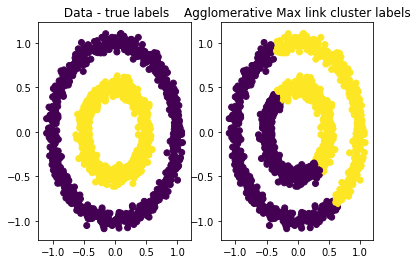

Circles 2 Dataset


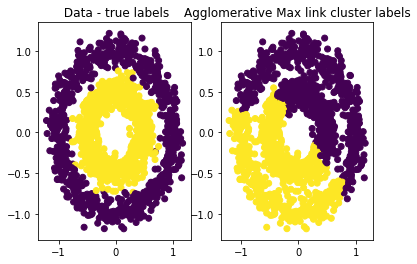

In [78]:
dat = [Circles1_X, Circles2_X]
lab = [Circles1_y, Circles2_y]
x = 1
for data,lab in zip(dat,lab):
    n_clusters = 2
    avg_linkage = AgglomerativeClustering(linkage="average", n_clusters=n_clusters)
    y_pred = avg_linkage.fit_predict(data)

    fig, ax = plt.subplots()
    plt.subplot(1,2,1)
    plt.scatter(data[:, 0], data[:, 1], c=lab) # true clusters
    print("Circles "+str(x)+" Dataset")
    plt.title(' Data - true labels')
    plt.subplot(1,2,2)
    plt.scatter(data[:, 0], data[:, 1], c=y_pred)  # KMeans clusters
    plt.title('Agglomerative Max link cluster labels')
    plt.show()
    x=x+1
    preds4.append(y_pred)

<span style="color:green">**Answer:** </span>
Rank based on performance : Blobs1 > Blobs2 > Moons > Circles
<br> Blobs1 clearly separates the datasets except for 1  misclassified point. In moons dataset, one cluster is classified correct but one wing of the other cluster are wrongly predicted. The circles dataset doesnt predict any of the clusters perfectly.


<span style="color:red">**Question 4d:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using Average-link agglomerative clustering algorithm. Rank the datasets in decreasing order of Rand-Index scores.

In [22]:
for lab, p in zip(labels,preds4):
    print("rand-index value is :",rand_index(lab, p))

rand-index value is : 0.99911140760507
rand-index value is : 0.7636575494774294
rand-index value is : 0.7132310429175005
rand-index value is : 0.7457647320435846
rand-index value is : 0.500414498554592
rand-index value is : 0.5050780520346898


<span style="color:green">**Answer:** </span>
Performance : Blobs1 > Blobs2 > Moons2 > Moons1 > Circles2 > Circles1


<span style="color:red">**Question 4e:** </span> Are the rankings in 4(c) consistent with your observations in 4(d)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer:** </span>
yes, the performance ranking is same compared to the observations.


### 5. Density Based Clustering: DBSCAN

<span style="color:red">**Question 5a:** </span> Without running DBSCAN clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where DBSCAN clustering is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span>
As DBSCAN is based on desity regions, we can say it doesnt work well on the distributes data. It works well on the data with compact regions. Of the datasets, BLOBS1, Circles1 and Moons1  datasets are more compact and DBSCAN works good on them.


<span style="color:red">**Question 5b:** </span> Without running DBSCAN clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where DBSCAN clustering is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span>
DBSCAN works worst on the Blobs2 dataset. This is because, the regions we get on the Blobs2 are more distributed and 2 of these clusters are almost merging with other. DBSCAN works bad on these type of merging clusters. Also DBSCAN algorithm mostly depends on the epsilon and min_samples values.



<span style="color:red">**Question 5c:** </span> Run DBSCAN clustering algorithm on all the datasets (except Rand). __Choose eps and min_samples parameters to make sure that DBSCAN finds the same number of clusters as in the ground truth ('Data_y').__ Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of DBSCAN clustering algorithm performance. Describe your rationale for your ranking.

Blobs 1 Dataset


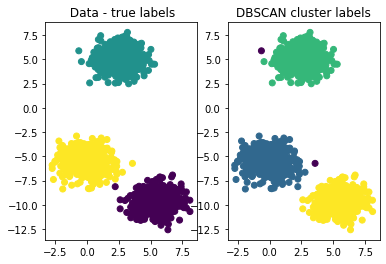

Blobs 2 Dataset


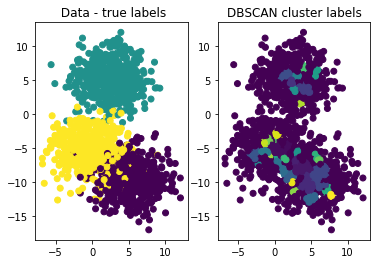

In [84]:
dat = [Blobs1_X, Blobs2_X]
lab = [Blobs1_y, Blobs2_y]
eps = [1, 0.4]
samp = [5, 7]
x = 1
preds5 = []
np = []
for data,lab,eps,min_samples in zip(dat,lab,eps,samp):
    dbscan = DBSCAN(eps, min_samples)
    y_pred = dbscan.fit_predict(data)

    fig, ax = plt.subplots()
    plt.subplot(1,2,1)
    plt.scatter(data[:, 0], data[:, 1], c=lab) # true clusters
    print("Blobs "+str(x)+" Dataset")
    plt.title(' Data - true labels')
    plt.subplot(1,2,2)
    plt.scatter(data[:, 0], data[:, 1], c=y_pred)  # KMeans clusters
    plt.title('DBSCAN cluster labels')
    plt.show()
    x=x+1
    p = sum(y_pred==-1)
    preds5.append(y_pred)
    np.append(p)

Moons 1 Dataset


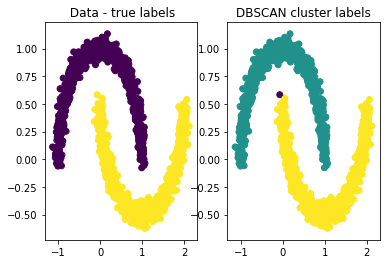

Moons 2 Dataset


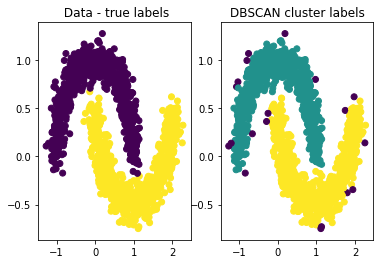

In [85]:
dat = [Moons1_X, Moons2_X]
lab = [Moons1_y, Moons2_y]
eps = [0.1, 0.1]
samp = [20, 5]
x = 1
for data,lab,eps,min_samples in zip(dat,lab,eps,samp):
    dbscan = DBSCAN(eps, min_samples)
    y_pred = dbscan.fit_predict(data)

    fig, ax = plt.subplots()
    plt.subplot(1,2,1)
    plt.scatter(data[:, 0], data[:, 1], c=lab) # true clusters
    print("Moons "+str(x)+" Dataset")
    plt.title(' Data - true labels')
    plt.subplot(1,2,2)
    plt.scatter(data[:, 0], data[:, 1], c=y_pred)  # KMeans clusters
    plt.title('DBSCAN cluster labels')
    plt.show()
    x=x+1
    p = sum(y_pred==-1)
    preds5.append(y_pred)
    np.append(p)

Circles 1 Dataset


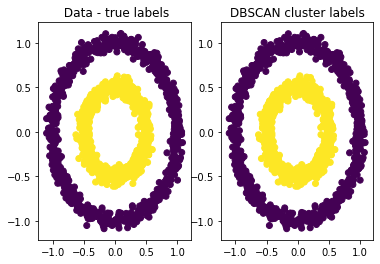

Circles 2 Dataset


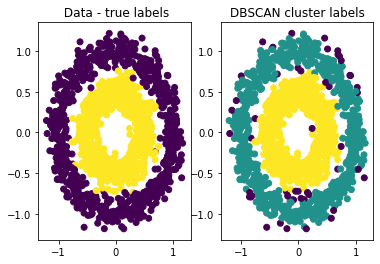

In [86]:
dat = [Circles1_X, Circles2_X]
lab = [Circles1_y, Circles2_y]
eps = [0.1, 0.1]
samp = [10, 8]
x = 1
for data,lab,eps,min_samples in zip(dat,lab,eps,samp):
    dbscan = DBSCAN(eps, min_samples)
    y_pred = dbscan.fit_predict(data)

    fig, ax = plt.subplots()
    plt.subplot(1,2,1)
    plt.scatter(data[:, 0], data[:, 1], c=lab) # true clusters
    print("Circles "+str(x)+" Dataset")
    plt.title(' Data - true labels')
    plt.subplot(1,2,2)
    plt.scatter(data[:, 0], data[:, 1], c=y_pred)  # KMeans clusters
    plt.title('DBSCAN cluster labels')
    plt.show()
    x=x+1
    p = sum(y_pred==-1)
    preds5.append(y_pred)
    np.append(p)

<span style="color:green">**Answer:** </span>Performance: <br>
Circles1 > Moons1 > Blobs1 > Moons2 > Circles2 > Blobs2 
<br> I think that all the three number"1" datasets are good but, circles1 doesnt get any outliers, moons1 with only 1 outlier, whereas blobs1 has 2 outliers. Circles2, Moons2 have severeal outliers. All the datasets are successfull in getting the number of clusters except BLOBS2 dataset, Blobs2 couldnt perform well even if i had changed eps, minpoints values.

<span style="color:red">**Question 5d:** </span> For each of the datasets, how many noise points did the DBSCAN algorithm find? Which three datasets had the least number of noise points? Explain the reason(s) why these datasets had least noise points?

In [87]:
print(np)

[2, 885, 1, 19, 0, 48]


<span style="color:green">**Answer:** </span>Number of Noise points::
<br>Blobs1: 2
<br>Blobs2: 885
<br>Moons1: 1
<br>Moons2: 19
<br>Circles1: 0
<br>Circles2: 48
<br> Circles1, Moons1, Blobs1 have the least number of noise points. This is because the datasets are dense enough to get the required min_points in the epsilon and , so the number of outliers formed for this dense and well separated data are low.

<span style="color:red">**Question 5e:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using DBSCAN clustering algorithm. Rank the datasets in decreasing order of Rand-Index scores.

In [88]:
import numpy as np
###remove outliers###
label_upd = []
pred_upd = []
preds5 = np.array(preds5)
for i in range(6):
    pos = np.where(preds5[i] == -1)
    x = np.delete(labels[i],pos)
    label_upd.append(x)
    y = np.delete(preds5[i],pos)
    pred_upd.append(y)


In [89]:
for lab, p in zip(label_upd,pred_upd):
    print("rand-index value is :",rand_index(lab, p))

rand-index value is : 0.9991099243435692
rand-index value is : 0.685172532507084
rand-index value is : 1.0
rand-index value is : 0.9959541580743472
rand-index value is : 1.0
rand-index value is : 0.9890338761336819


<span style="color:green">**Answer:** </span>
Performance based on rand-index:
Moons1, Circles1 > Blobs1 > Moons2 > Circles2 > Blobs2


<span style="color:red">**Question 5f:** </span> Are the rankings in 5(c) consistent with your observations in 5(e)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer:** </span>
It was almost the same, except that as i removed the outliers, the rand-index value gave best for both circles1 and moons1. It also good rand-index performance on circles2 and Moons2, it is because i had removed the outliers. Blobs 2 is worst of all datasets.


### 6. Spectral Clustering

<span style="color:red">**Question 6a:** </span> Without running Spectral clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Spectral clustering is expected to work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span> I expect Blobs Datsets to perform well, because 
Spectral Clustering is expected to perform well on data with high intra cluster affinity and low inter cluster affinity to the points. So globular datasets have high intra cluster affinity because we get high affinity between its cluster points.


<span style="color:red">**Question 6b:** </span> Without running Spectral clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Spectral clustering is expected to NOT work well. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span>
The circles datsets are expected to peform worst, because the affinity between a point form outer cluster to most of the inner circle points are expected to be high. So, when finding cluster based on the kmeans clustering we use best affinity points, here which can be other cluster points.


<span style="color:red">**Question 6c:** </span> Run Spectral clustering algorithm on all the datasets (except Rand). Choose n_clusters based on the number of clusters present in these datasets. Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of Spectral clustering algorithm performance. Describe your rationale for your ranking.

Blobs 1 Dataset


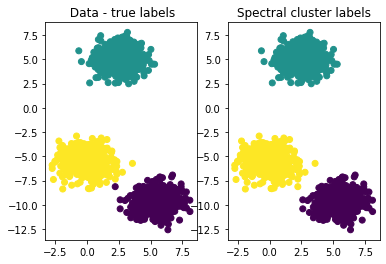

Blobs 2 Dataset


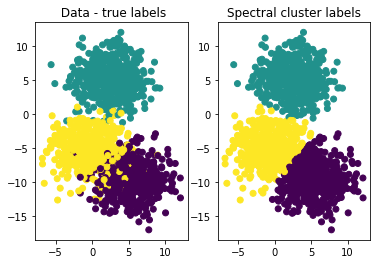

In [42]:
dat = [Blobs1_X, Blobs2_X]
lab = [Blobs1_y, Blobs2_y]
x = 1
preds6 = []
for data,lab in zip(dat,lab):
    n_clusters = 3
    spectral = SpectralClustering(n_clusters=n_clusters, random_state=random_state)
    y_pred = spectral.fit_predict(data)

    fig, ax = plt.subplots()
    plt.subplot(1,2,1)
    plt.scatter(data[:, 0], data[:, 1], c=lab) # true clusters
    print("Blobs "+str(x)+" Dataset")
    plt.title(' Data - true labels')
    plt.subplot(1,2,2)
    plt.scatter(data[:, 0], data[:, 1], c=y_pred)  # KMeans clusters
    plt.title('Spectral cluster labels')
    plt.show()
    x=x+1
    preds6.append(y_pred)

Moons 1 Dataset


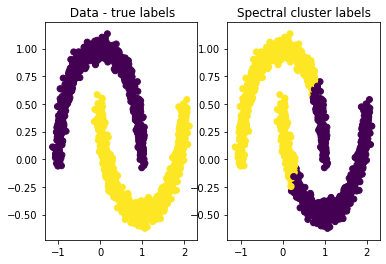

Moons 2 Dataset


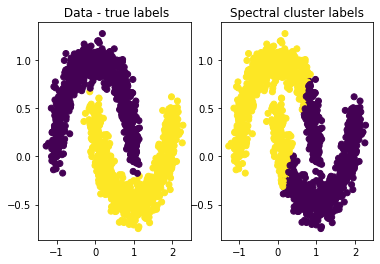

In [43]:
dat = [Moons1_X, Moons2_X]
lab = [Moons1_y, Moons2_y]
x = 1
for data,lab in zip(dat,lab):
    n_clusters = 2
    spectral = SpectralClustering(n_clusters=n_clusters, random_state=random_state)
    y_pred = spectral.fit_predict(data)

    fig, ax = plt.subplots()
    plt.subplot(1,2,1)
    plt.scatter(data[:, 0], data[:, 1], c=lab) # true clusters
    print("Moons "+str(x)+" Dataset")
    plt.title(' Data - true labels')
    plt.subplot(1,2,2)
    plt.scatter(data[:, 0], data[:, 1], c=y_pred)  # KMeans clusters
    plt.title('Spectral cluster labels')
    plt.show()
    x=x+1
    preds6.append(y_pred)

Circles 1 Dataset


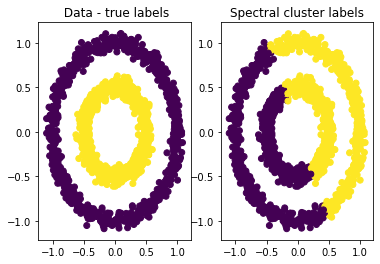

Circles 2 Dataset


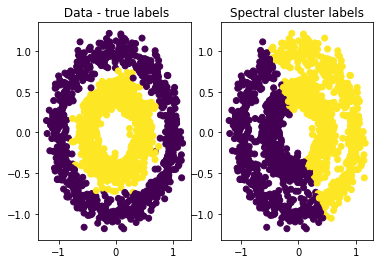

In [44]:
dat = [Circles1_X, Circles2_X]
lab = [Circles1_y, Circles2_y]
x = 1
for data,lab in zip(dat,lab):
    n_clusters = 2
    spectral = SpectralClustering(n_clusters=n_clusters, random_state=random_state)
    y_pred = spectral.fit_predict(data)

    fig, ax = plt.subplots()
    plt.subplot(1,2,1)
    plt.scatter(data[:, 0], data[:, 1], c=lab) # true clusters
    print("Circles "+str(x)+" Dataset")
    plt.title(' Data - true labels')
    plt.subplot(1,2,2)
    plt.scatter(data[:, 0], data[:, 1], c=y_pred)  # KMeans clusters
    plt.title('Spectral cluster labels')
    plt.show()
    x=x+1
    preds6.append(y_pred)

<span style="color:green">**Answer:** </span>Performance:
<br> Blobs1 > Blobs2 > Moons1 > Moons2 > Circles1 > Circles2
<br> We can clearly see that the clusters have been well distinguished in blobs plots. In Moons plot visual we can see that inner edges of the both moons are clustered into other class. But, in circles dataset almost half of the datapoints are misclassifed. 



<span style="color:red">**Question 6d:** </span> For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using Spectral clustering algorithm. Rank the datasets in decreasing order of Rand-Index scores.

In [45]:
for lab, p in zip(labels,preds6):
    print("rand-index value is :",rand_index(lab, p))

rand-index value is : 0.99911140760507
rand-index value is : 0.919189682010229
rand-index value is : 0.6441263064265066
rand-index value is : 0.6448441183010896
rand-index value is : 0.49966733377807426
rand-index value is : 0.4997553924838781


<span style="color:green">**Answer:** </span>Performance:
<br> Blobs1 > Blobs2 > Moons2 > Moons1 > Circles2 > Circles1



<span style="color:red">**Question 6e:** </span> Are the rankings in 6(c) consistent with your observations in 6(d)? If not, explain the reason why your rankings were inconsistent.

<span style="color:green">**Answer:** </span>
Yes, the rankings are consistent between visual and rand-index observations.


### 7. Clustering Tendency

<span style="color:red">**Question 7a:** </span> Without using any metrics, for all the datasets (INCLUDING __Rand__) provided in the practice session, list the datasets that exhibit good clustering tendency. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span>
Blobs1, Moons1 Datasets are expected to exhibit good clustering tendencies. This is because , we can see from the plot that the Blobs1 and Moons1 datasets ahve formed good clusters and they are well separated from each other too. All other Blobs2, Moons2,Circles datasets are also good but these datasets are not that well separated clusters. 


<span style="color:red">**Question 7b:** </span> Without using any metrics, for all the datasets (INCLUDING Rand) provided in the practice session, list the datasets that do NOT exhibit good clustering tendency. Support your answer by explaining your rationale.

<span style="color:green">**Answer:** </span>
Rand Dataset is expected to have very bad tendency to form clusters. In the data visual of rand dataset we can clearly see that random data is spread along all the regions and there is no well separated data in that plot(which indicate clusters).


<span style="color:red">**Question 7c:** </span> Compute Hopkins Statistic statistic for all the datasets and rank them based on decreasing order of this metric.

In [46]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

def hopkins(X):
    n = X.shape[0] #rows
    d = X.shape[1] #cols
    p = int(0.1 * n) #considering 10% of points
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)
 
    rand_X = sample(range(0, n), p) 
 
    uj = []
    wj = []
    for j in range(0, p):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        uj.append(u_dist[0][1]) #distances to nearest neighbors in random data
        w_dist, _ = nbrs.kneighbors(X[rand_X[j]].reshape(1, -1), 2, return_distance=True)
        wj.append(w_dist[0][1]) #distances to nearest neighbors in real data
 
    H = sum(uj) / (sum(uj) + sum(wj))
    if isnan(H):
        print(uj, wj)
        H = 0
 
    return H

In [47]:
hopkins(Blobs1_X)

0.9349462223999753

In [48]:
hopkins(Blobs2_X)

0.8522597673857115

In [49]:
hopkins(Moons1_X)

0.9279578865564826

In [50]:
hopkins(Moons2_X)

0.872765578524285

In [51]:
hopkins(Circles1_X)

0.8327282524679773

In [52]:
hopkins(Circles2_X)

0.7453676870118475

In [53]:
hopkins(Rand_X)

0.598193229953017

<span style="color:green">**Answer:** </span>
Blobs1 > Moons1 > Moons2 > Blobs2 > Circles1 > Circles2 > Rand


<span style="color:red">**Question 7d:** </span> Are your answers for 7(a) and 7(b) consistent with that of (c)? If not, explain the reason for this inconsistency.

<span style="color:green">**Answer:** </span>
Yes answers in the 7a and b are in consistent with 7c. The higher rand_index indicated best clustering tendency. So blobs1 data has the highest clustering tendency and rand data has lowest.


<span style="color:red">**Question 7e:** </span> Run all the above clustering algorithms (KMeans, GMM, Agglomerative (single, max, average), DBSCAN, Spectral), using n_clusters = 3, on Rand dataset and visualize the clusters. Explain the reason for the shapes of clusters dervied using each clustering approach.

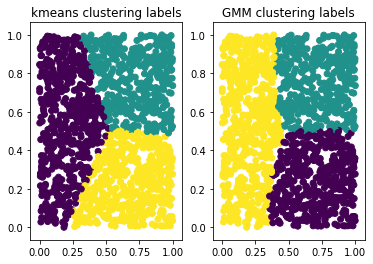

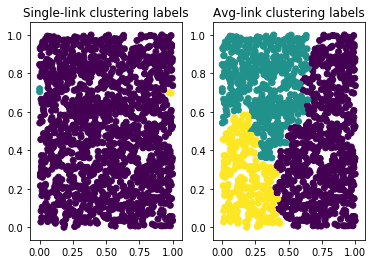

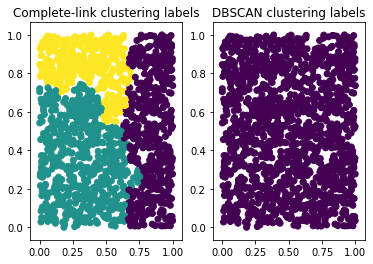

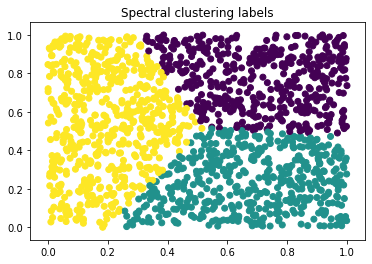

In [54]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state);
y_pred = kmeans.fit_predict(Rand_X)
plt.subplot(1,2,1)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1], c=y_pred)
plt.title('kmeans clustering labels')
gmm = GaussianMixture(n_components=n_clusters, covariance_type='full')
y_pred = gmm.fit_predict(Rand_X)
plt.subplot(1,2,2)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1], c=y_pred)
plt.title('GMM clustering labels')
plt.show()

single_linkage = AgglomerativeClustering(linkage="single", n_clusters=n_clusters)
y_pred = single_linkage.fit_predict(Rand_X)
plt.subplot(1,2,1)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1], c=y_pred)
plt.title('Single-link clustering labels')
avg_linkage = AgglomerativeClustering(linkage="average", n_clusters=n_clusters)
y_pred = avg_linkage.fit_predict(Rand_X)
plt.subplot(1,2,2)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1], c=y_pred)
plt.title('Avg-link clustering labels')
plt.show()

complete_linkage = AgglomerativeClustering(linkage="complete", n_clusters=n_clusters)
y_pred = complete_linkage.fit_predict(Rand_X)
plt.subplot(1,2,1)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1], c=y_pred)
plt.title('Complete-link clustering labels')
dbscan = DBSCAN(eps=0.1, min_samples=4)
y_pred = dbscan.fit_predict(Rand_X)
plt.subplot(1,2,2)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1], c=y_pred)
plt.title('DBSCAN clustering labels')
plt.show()

spectral = SpectralClustering(n_clusters=n_clusters, random_state=random_state)
y_pred = spectral.fit_predict(Rand_X)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1], c=y_pred)
plt.title('Spectral clustering labels')
plt.show()


<span style="color:green">**Answer:** </span>
Kmeans and spectral clustering have same type of plots this is because the spectral clustering consists of kmeans approach and forms similar type of plots. As GMM is based on gaussian distribution we get plot like a regions. Single link clustering gives one point clusters which are bad. Avg link and Complete link clustering gives clusters with different shapes. DBSCAN algorithm didnt give any clusters, this is because the density of the data is spread across all regions in the plot which makes all points as one cluster even if we take less epsilon value.

### 8. Real-world dataset

We will use the same breast cancer dataset we used for Classificatione exercise here.

In [55]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()

The features are:

In [56]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Class labels are:

In [57]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

Create dataset for classification

In [58]:
Cancer_X = cancer.data
Cancer_y = cancer.target

Size of Cancer_X and Cancer_y

In [59]:
Cancer_X.shape

(569, 30)

In [60]:
Cancer_y.shape

(569,)

<span style="color:red">**Question 8a:** </span> Compute SSE for k = range(2,40), i.e, for k=2,3,4,...,40

In [61]:
score = np.zeros(41);
for i in range(2,41):
    kmeans = KMeans(n_clusters=i, random_state=random_state); #Initializing KMeans for different n_clusters
    kmeans.fit_predict(Cancer_X)  #Clustering using KMeans
    score[i] = -kmeans.score(Cancer_X)  #Computing SSE
    print("SSE for k=",i,":", round(score[i],2)) #Printing SSE

SSE for k= 2 : 77943099.88
SSE for k= 3 : 47285926.9
SSE for k= 4 : 29226541.65
SSE for k= 5 : 20539877.62
SSE for k= 6 : 16558716.7
SSE for k= 7 : 13249736.07
SSE for k= 8 : 11183535.78
SSE for k= 9 : 9609383.58
SSE for k= 10 : 8487166.05
SSE for k= 11 : 7613587.21
SSE for k= 12 : 6784588.86
SSE for k= 13 : 6157087.42
SSE for k= 14 : 5708365.13
SSE for k= 15 : 5286031.4
SSE for k= 16 : 4848940.46
SSE for k= 17 : 4398276.58
SSE for k= 18 : 4009831.04
SSE for k= 19 : 3738118.1
SSE for k= 20 : 3578729.29
SSE for k= 21 : 3312041.59
SSE for k= 22 : 3102392.22
SSE for k= 23 : 2894387.69
SSE for k= 24 : 2768624.68
SSE for k= 25 : 2685795.48
SSE for k= 26 : 2514580.5
SSE for k= 27 : 2362959.95
SSE for k= 28 : 2257591.62
SSE for k= 29 : 2148955.49
SSE for k= 30 : 2036764.0
SSE for k= 31 : 1969448.35
SSE for k= 32 : 1833170.63
SSE for k= 33 : 1791369.0
SSE for k= 34 : 1722589.76
SSE for k= 35 : 1677340.13
SSE for k= 36 : 1656114.54
SSE for k= 37 : 1528956.63
SSE for k= 38 : 1496563.45
SSE for k

<span style="color:red">**Question 8b:** </span> Plot SSE values for k = range(2,40), i.e, for k=2,3,4,...,40

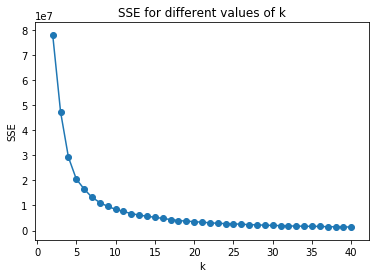

In [62]:
plt.plot(range(2,41),score[2:41])
plt.scatter(range(2,41),score[2:41])
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('SSE for different values of k')
plt.show()

<span style="color:red">**Question 8c:** </span> Using this plot, determine the 'k' that you will use to do K-Means clustering.

<span style="color:green">**Answer:** </span>
I will choose my k value as k = 5, because after k=5 the SSE not that much reduced.


<span style="color:red">**Question 8d:** </span> Using the 'k' you chose in (c), compute k-Means clustering.

In [63]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
y_pred = kmeans.fit_predict(Cancer_X)

<span style="color:red">**Question 8e:** </span> Plot the silhouette values for points in each cluster (using the silhouette() function provided in the practice notebook). .

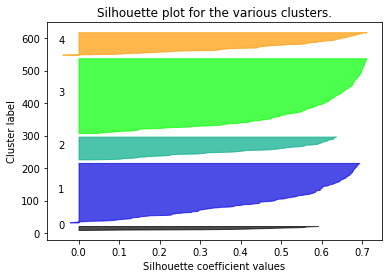

In [64]:
silhouette(Cancer_X,y_pred)

<span style="color:red">**Question 8f:** </span> Comment on the quality of the clusters discovered using k-Means. Which of the clusters would you treat as good clusters and which clusters do you treat as not-so-good clusters?

<span style="color:green">**Answer:** </span>
The Clusters are that good, as we can see some clusters have very less number of points(cluster 0). Cluster number 3 is good cluster as it has good cohesion and separation(It has good number of points and silhouette value is high). Cluster 1 and 4 are not bad either. But clusters 0 and 2 are bad as they have low silhouette value.


<span style="color:red">**Question 8g:** </span> Compute the Rand Index of the k-means clusters with respect to the true labels. Comment on the quality of the clustering based on the Rand-Index score.

In [65]:
print(rand_index(Cancer_y,y_pred))

0.6625473402807001


<span style="color:green">**Answer:** </span>
Rand index high means that the data has good clusters. But we get 0.66 hwich means clusters in the data are bad.


<span style="color:red">**Question 8h:** </span> To use DBSCAN to find clusters in this data, one needs to determine eps and min_samples. To do this, consider the range of values eps = 50, 100, 150, 200, 250, 300, 400, 500 and min_samples = 10, 15, 20, 25, 30. 

For these range of eps and min_samples values, compute an 8x5 matrix (with rows as eps values and cols as min_samples) to show the number of clusters obtained at each of these parameters. Visualize this matrix using imshow() in matplotlib.

Hint: To compute the number of clusters, you may use:

y_pred = dbscan.fit_predict(Cancer_X)

max(y_pred)+1

In [66]:
from itertools import *
import matplotlib.pyplot as plt

matx = []
eps = [50,100,150,200,250,300,400,500]
min_samples = [10,15,20,25,30]
for x in product(eps,min_samples):
    #print(x[0],x[1])
    dbscan = DBSCAN(eps=x[0], min_samples=x[1])
    y_pred = dbscan.fit_predict(Cancer_X)
    nc = max(y_pred)+1
    matx.append(nc)

matrix = np.reshape(matx,(8,5))
print(matrix)

[[1 1 1 2 1]
 [2 2 1 1 1]
 [1 1 1 2 2]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


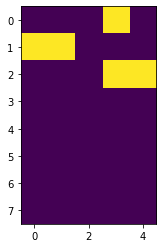

In [94]:
plt.imshow(matrix)
plt.show()

<span style="color:red">**Question 8i:** </span> For these range of eps and min_samples values, compute an 8x5 matrix (with rows as eps values and cols as min_samples) to show the number of noise points obtained at each of these parameters. Visualize this matrix using imshow() in matplotlib.

Hint: To compute the number of noise points, you may use:

y_pred = dbscan.fit_predict(Cancer_X)

sum(y_pred==-1)

In [91]:
from itertools import *
n = []
eps = [50,100,150,200,250,300,400,500]
min_samples = [10,15,20,25,30]
for x in product(eps,min_samples):
    #print(x[0],x[1])
    dbscan = DBSCAN(eps=x[0], min_samples=x[1])
    y_pred = dbscan.fit_predict(Cancer_X)
    p = sum(y_pred==-1)
    n.append(p)

noise = np.reshape(n,(8,5))
print(noise)

[[187 195 206 220 262]
 [ 56 100 143 148 158]
 [ 27  34  41  62  96]
 [ 20  21  25  31  31]
 [ 18  20  20  22  22]
 [ 12  15  19  20  21]
 [ 11  11  11  13  13]
 [  5   8   8  11  11]]


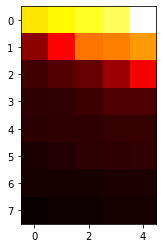

In [93]:
plt.imshow(noise,cmap=plt.get_cmap('hot'))
plt.show()

<span style="color:red">**Question 8j:** </span> What observations can you make about the clustering structure in this data, based on the matrices you generated for 8(g) and 8(h)?

<span style="color:green">**Answer:** </span>
The less epsilon and min_samples values can give us clusters, but the less epsilon and min_samples can result in many number of outliers. Also, the higher the epsilon value and lower the min_samples value, it results in less number of outliers, although the formation of clusters here is not good(no clusters are formed in our case). So while picking, epsilon value should not be much greater than min_samples value. We also need to test using low epsilon and min_samples values, because clusters are mostly formed here.


<span style="color:red">**Question 8k:** </span> Select the parameters for eps, min_samples based on your answers for 8(g), 8(h) and 8(i). Compute cluster assigments using DBSCAN. Compute RandIndex of the cluster assignments with respect to the true labels.

In [70]:
epsi = 100
min_samp = 10
dbscan = DBSCAN(eps= epsi, min_samples=min_samp)
y_pred = dbscan.fit_predict(Cancer_X)
print(y_pred)

[-1 -1  0  1  0  1  0  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1
 -1 -1  1 -1  1  1  0 -1  1 -1  1  1  1  1  1  1  1  1  0  1  1  0  1  1
  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1
 -1  1  1  1  1  0  0  1  1  1 -1 -1  1  0  1  0  1  1  1  1  1  1  1  0
  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  0 -1  1  1  1  1  0  1  0  1  1  1  1  0  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0 -1  1 -1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  0  1  1  1  1  1
  1  1  1  1  1  1  0  1  1  1 -1 -1  1  1  1  1  1  1  0  1 -1 -1  1  1
  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  0  1  1 -1  0  1  1
  1  1  1  1 -1  1  1  1  1  1 -1  1 -1  1 -1  1 -1  1  1  1  0  1  1  1
 -1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  0  1  0  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  0  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  0  1  1  1  0  1 -1  1  1  1  1  1

In [71]:
###remove outliers###
pos = np.where(y_pred == -1)
x = np.delete(Cancer_y,pos)
y = np.delete(y_pred,pos)

print(rand_index(x,y))

0.6580165692007798


<span style="color:red">**Question 8l:** </span> Compare RandIndex from 8(g) with that of 8(k) and determine which algorithm performed best? Based on this, comment on how the data/clusters may be distributed in $R^d$.

<span style="color:green">**Answer:** </span>
K-means gives the best rand-index value. This clearly shows that density based fails as we increase in the dimensions. This is because as the diemnsions increase, most of the points lie in the edges or outer regions which indicate the points are less dense. So kmeans has good chance of clustering these than DBSCAN(which is based on desity regions).

In [72]:
Cancer_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,